# Introduction

This competition was started many years back on kaggle.com. This competition is about predicting the loan default risk. After the global financial crisis back in 2008, banks are concerned about the potential default of the borrowers. In order to minimize the risk, Banks need to come up with a system which will help them in making right decisions regarding lending a loan. In this dataset, we have multiple files from bureau, application of applicants, their cash balance history, credit card history etc. Complete description and the dataset is available at kaggle at [this link](https://www.kaggle.com/c/home-credit-default-risk). This competition had the prize of about $70,000.

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
pd.set_option('display.max_columns', 500)

## ignore any warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from statistics import stdev, mean
from sklearn.model_selection import GridSearchCV

C:\Users\uzair\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir("C:\\Users\\uzair\\Codes\\Home Default risk")

# Loading data
We will load all the files. Although we can use just application dataset with a minimum loss of information.

In [3]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_bal = pd.read_csv('bureau_balance.csv')
prev_application = pd.read_csv('previous_application.csv')
cash_bal = pd.read_csv('POS_CASH_balance.csv')
credit_bal = pd.read_csv('credit_card_balance.csv')
installment_payment = pd.read_csv('installments_payments.csv')

# EDA

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

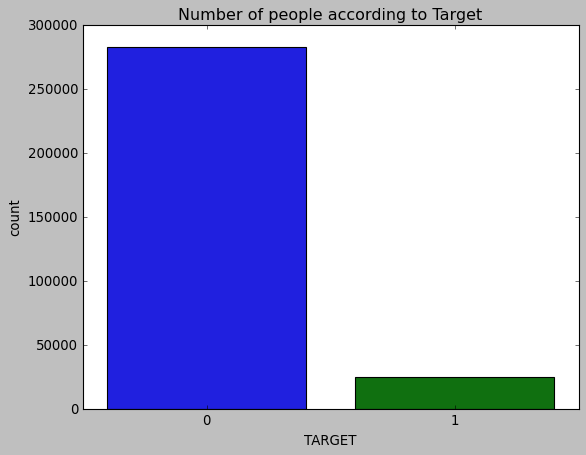

In [5]:
plt.style.use('classic')
sns.countplot(x=app_train['TARGET'])
plt.title('Number of people according to Target')
plt.show()

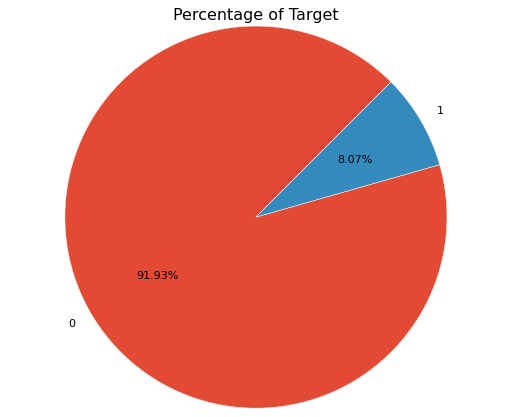

In [6]:
plt.style.use('ggplot')
perc = app_train['TARGET'].value_counts()
df_temp = pd.DataFrame({'Target' : perc.index,
                       'values': perc.values})

fig, ax = plt.subplots() 
ax.pie(df_temp['values'], 
       labels = df_temp['Target'],
       autopct = '%1.2f%%',
       startangle = 45)
ax.axis('equal')
plt.title('Percentage of Target')
plt.show()

Target variable is highly unbalanced. We have lots of zeros. If we randomly predict zeros for testing, we will have high accuracy. So we need to be careful in testing the performance of our model.

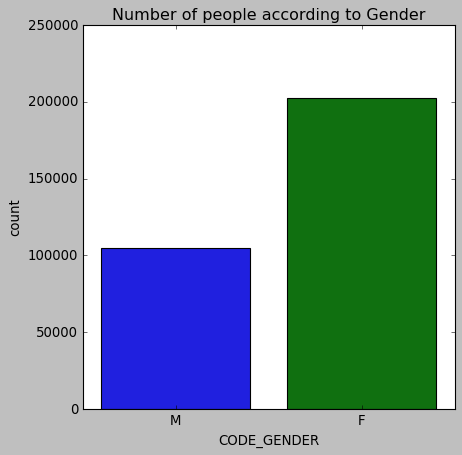

In [7]:
plt.style.use('classic')
plt.figure(figsize=(6, 6))

sns.countplot(x=app_train['CODE_GENDER'][app_train['CODE_GENDER'] != 'XNA'])
plt.title('Number of people according to Gender')
plt.show()

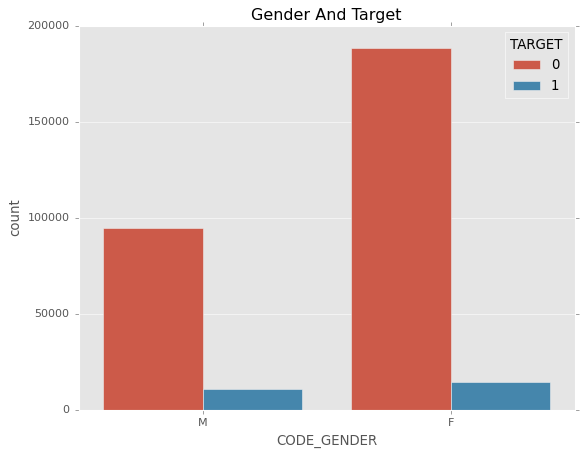

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

sns.countplot(x= app_train['CODE_GENDER'][app_train['CODE_GENDER'] != 'XNA'],
             hue = app_train['TARGET'])
plt.title('Gender And Target')
plt.show()

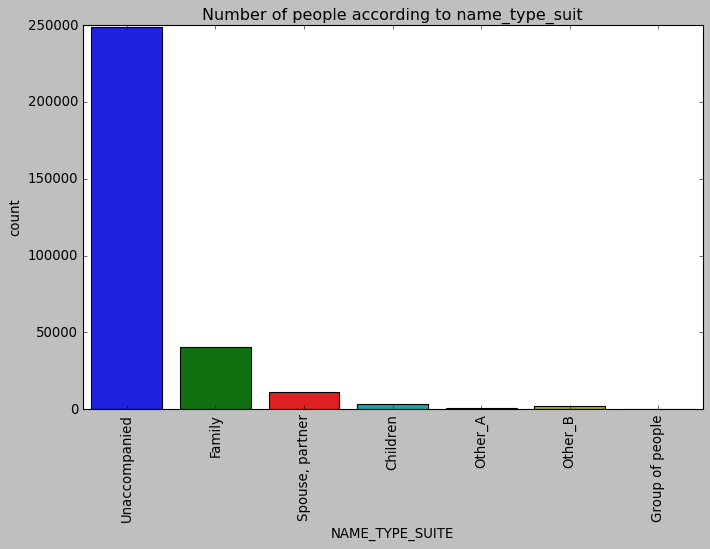

In [9]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))

sns.countplot(x= app_train['NAME_TYPE_SUITE'])
plt.title('Number of people according to name_type_suit')
plt.xticks(rotation = 90)
plt.show()

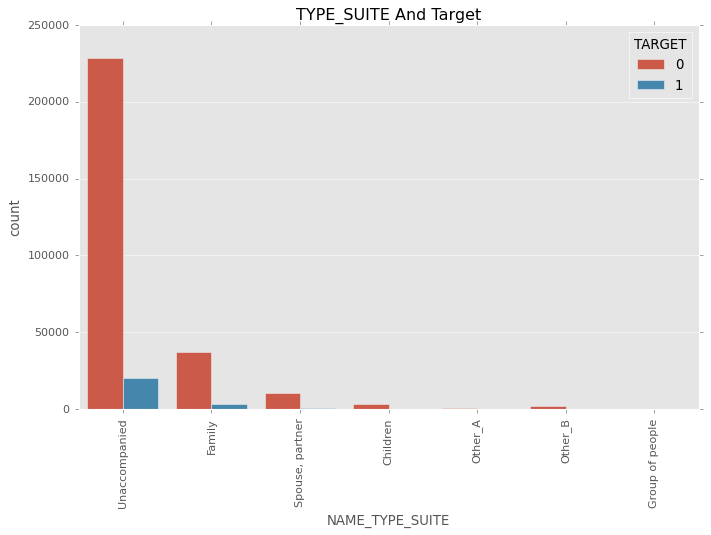

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

sns.countplot(x= app_train['NAME_TYPE_SUITE'],
             hue = app_train['TARGET'])
plt.title('TYPE_SUITE And Target')
plt.xticks(rotation = 90)
plt.show()

Majority of the people are in unaccompanied group.

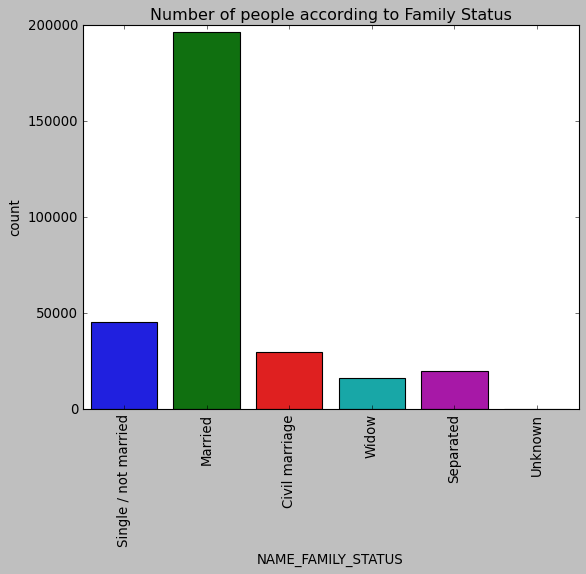

In [11]:
plt.style.use('classic')
plt.figure(figsize=(8, 6))

sns.countplot(x= app_train['NAME_FAMILY_STATUS'])
plt.title('Number of people according to Family Status')
plt.xticks(rotation = 90)
plt.show()

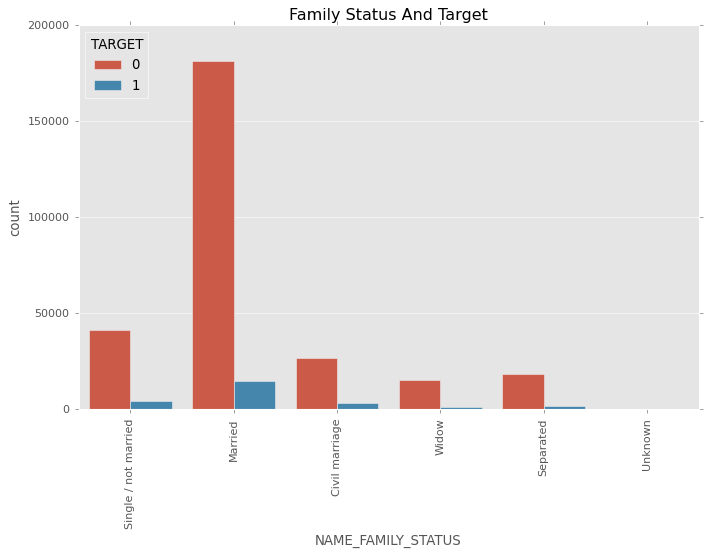

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.countplot(x= app_train['NAME_FAMILY_STATUS'],
             hue = app_train['TARGET'])
plt.title('Family Status And Target')
plt.xticks(rotation = 90)
plt.show()

Majority of the people are married.

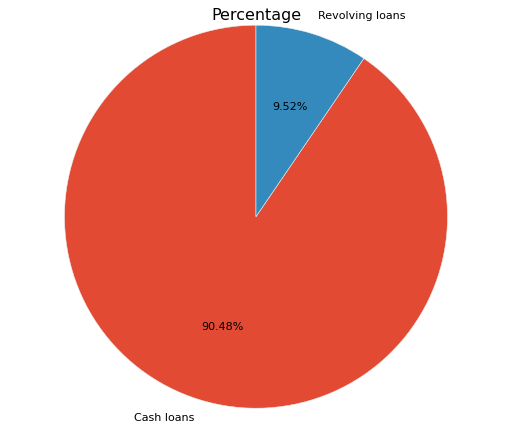

In [13]:
plt.style.use('ggplot')
perc_loans = app_train['NAME_CONTRACT_TYPE'].value_counts()
loans_temp = pd.DataFrame({'Target' : perc_loans.index,
                           'values': perc_loans.values})

fig, ax = plt.subplots() 
ax.pie(loans_temp['values'], 
       labels = loans_temp['Target'],
       autopct = '%1.2f%%',
       startangle = 90)
ax.axis('equal')
plt.title('Percentage')
plt.show()

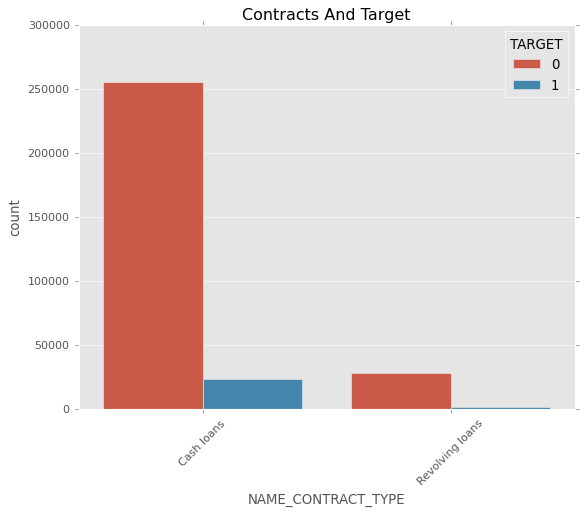

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(x= app_train['NAME_CONTRACT_TYPE'],
             hue = app_train['TARGET'])
plt.title('Contracts And Target')
plt.xticks(rotation = 45)
plt.show()

Higher number of applicants for cash loans according to the data.

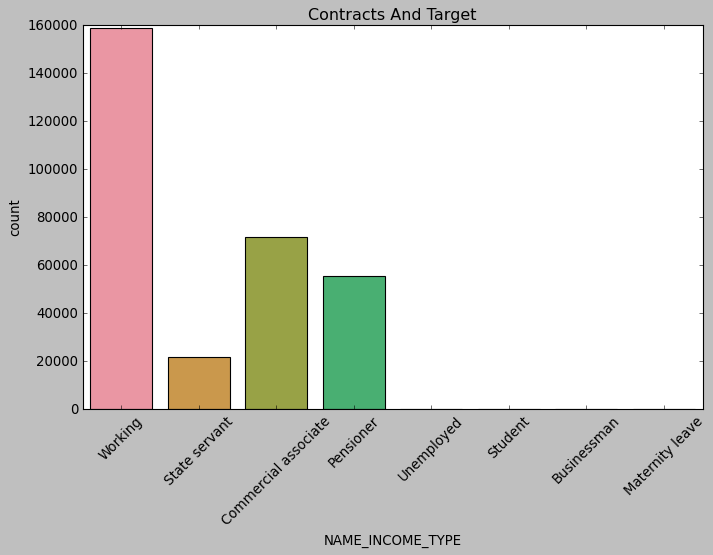

In [15]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))

sns.countplot(x= app_train['NAME_INCOME_TYPE'])
plt.title('Contracts And Target')
plt.xticks(rotation = 45)
plt.show()

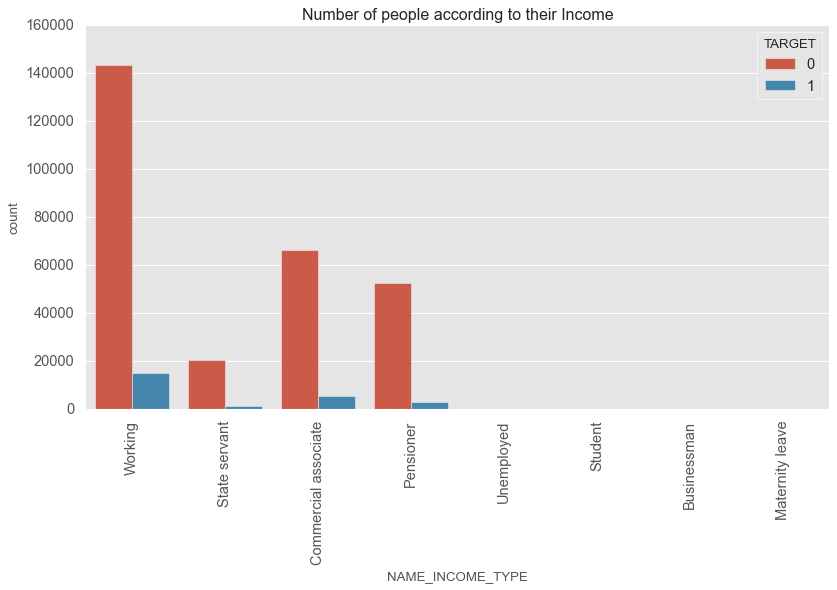

In [16]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
sns.countplot(app_train['NAME_INCOME_TYPE'], 
              hue = app_train['TARGET'], dodge=True)
plt.title('Number of people according to their Income')
plt.xticks(rotation = 90)
plt.show()

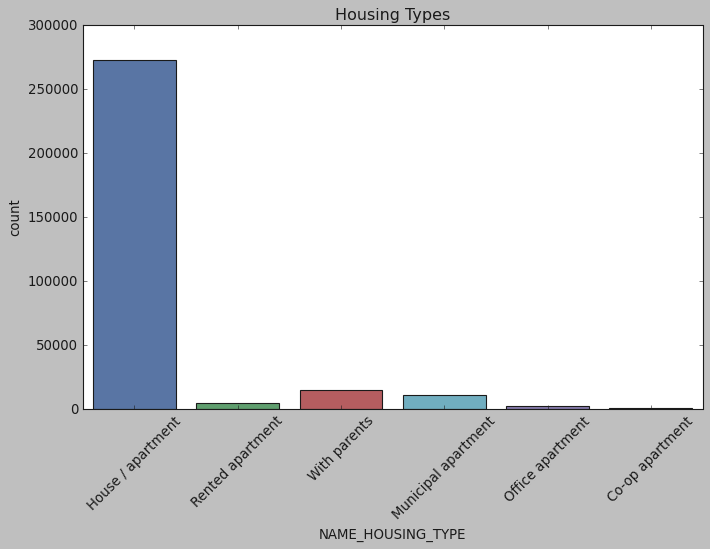

In [17]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))

sns.countplot(app_train['NAME_HOUSING_TYPE'])
plt.title('Housing Types')
plt.xticks(rotation = 45)
plt.show()

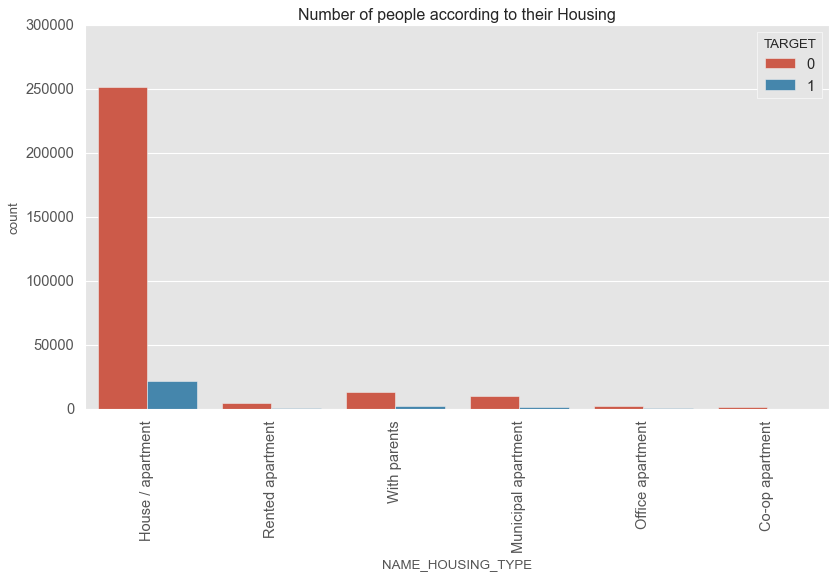

In [18]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
sns.countplot(app_train['NAME_HOUSING_TYPE'], 
              hue = app_train['TARGET'], dodge=True)
plt.title('Number of people according to their Housing')
plt.xticks(rotation = 90)
plt.show()

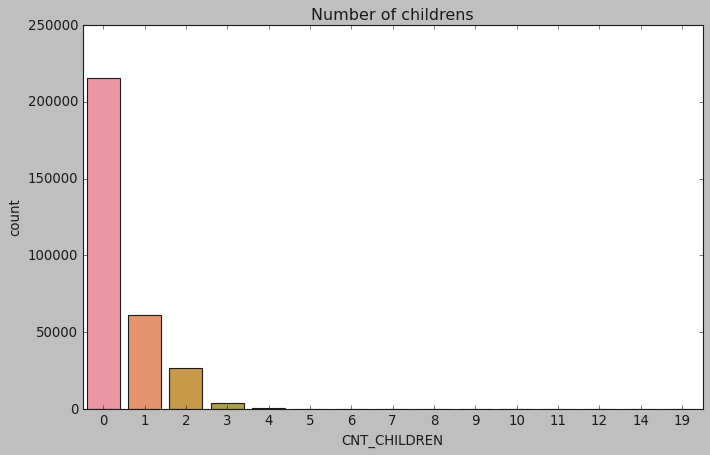

In [19]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))

sns.countplot(app_train['CNT_CHILDREN'])
plt.title('Number of childrens')
plt.show()

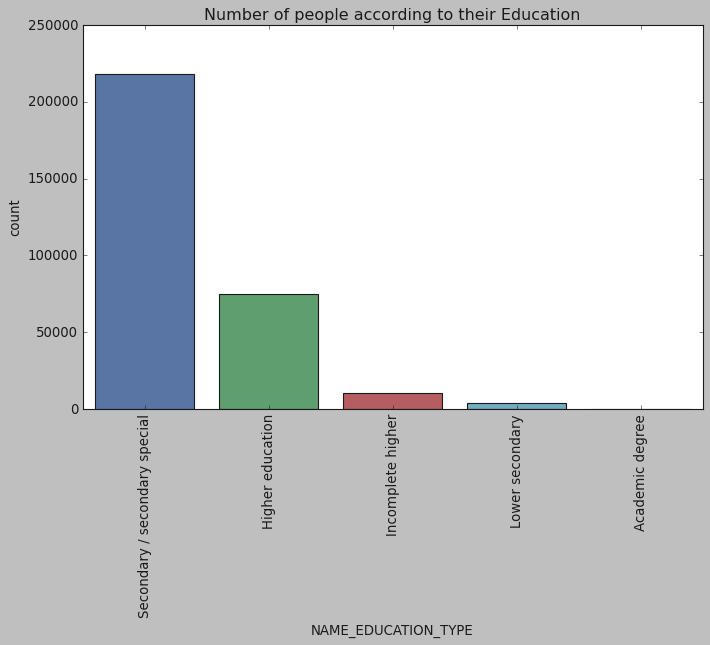

In [20]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))

sns.countplot(app_train['NAME_EDUCATION_TYPE'])
plt.title('Number of people according to their Education')
plt.xticks(rotation = 90)
plt.show()

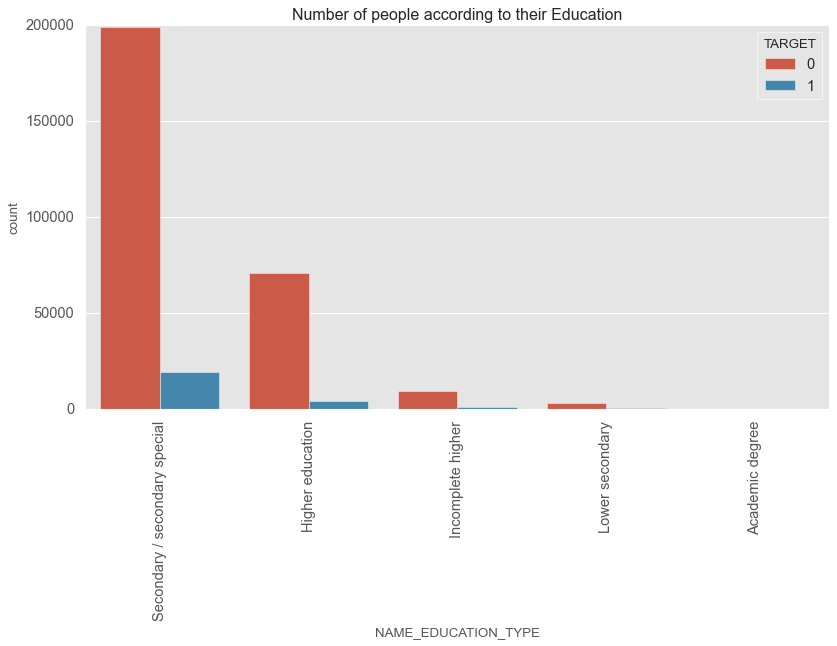

In [21]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
sns.countplot(app_train['NAME_EDUCATION_TYPE'], 
              hue = app_train['TARGET'], dodge=True)
plt.title('Number of people according to their Education')
plt.xticks(rotation = 90)
plt.show()

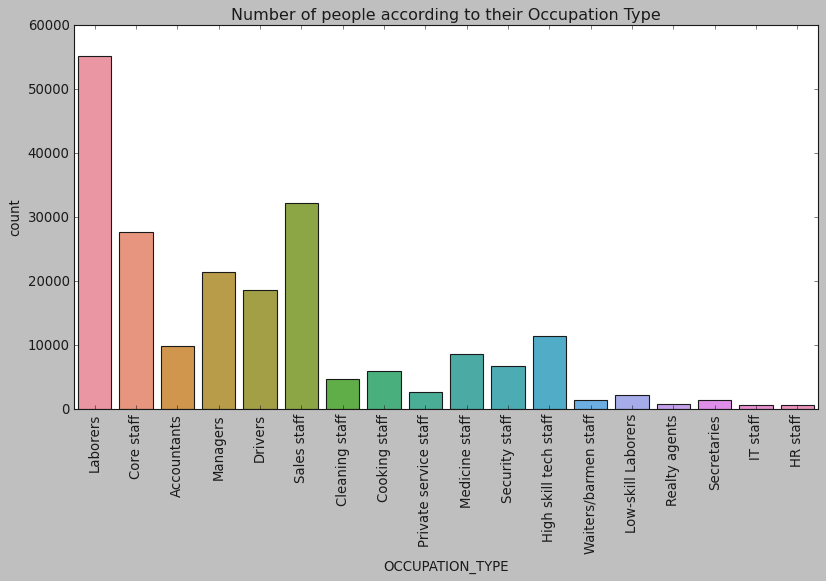

In [22]:
plt.style.use('classic')
plt.figure(figsize=(12, 6))

sns.countplot(app_train['OCCUPATION_TYPE'])
plt.title('Number of people according to their Occupation Type')
plt.xticks(rotation = 90)
plt.show()


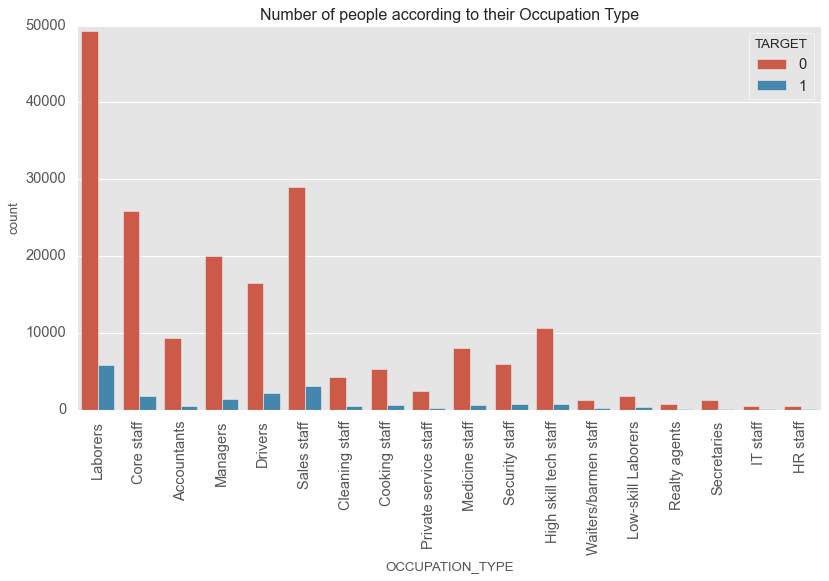

In [23]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
sns.countplot(app_train['OCCUPATION_TYPE'], 
              hue = app_train['TARGET'], dodge=True)
plt.title('Number of people according to their Occupation Type')
plt.xticks(rotation = 90)
plt.show()

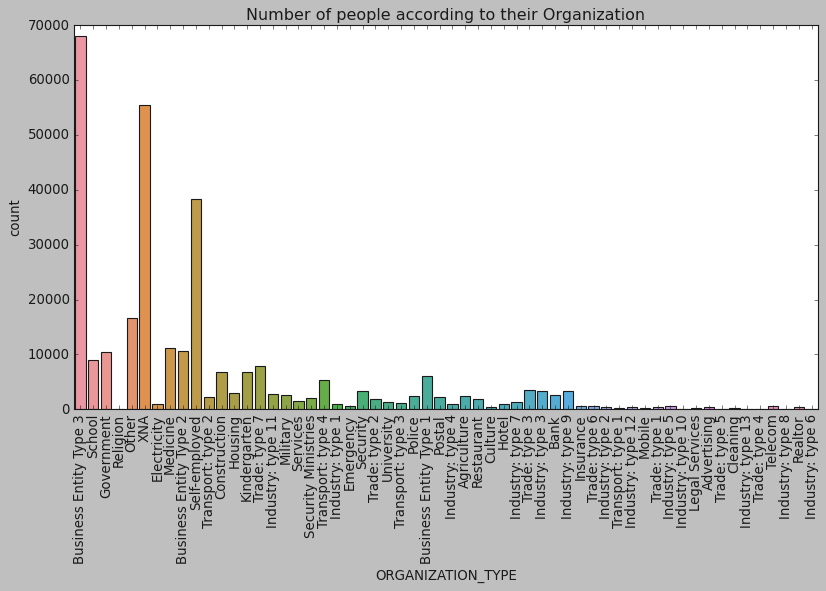

In [24]:
plt.style.use('classic')
plt.figure(figsize=(12, 6))
sns.countplot(app_train['ORGANIZATION_TYPE'])
plt.title('Number of people according to their Organization')
plt.xticks(rotation = 90)
plt.show()

Looking at every graph above, we can see variables which are highly unbalanced, number of people grouped according to a particular condition are not equally distributed.

## Distribution of Application Dataset

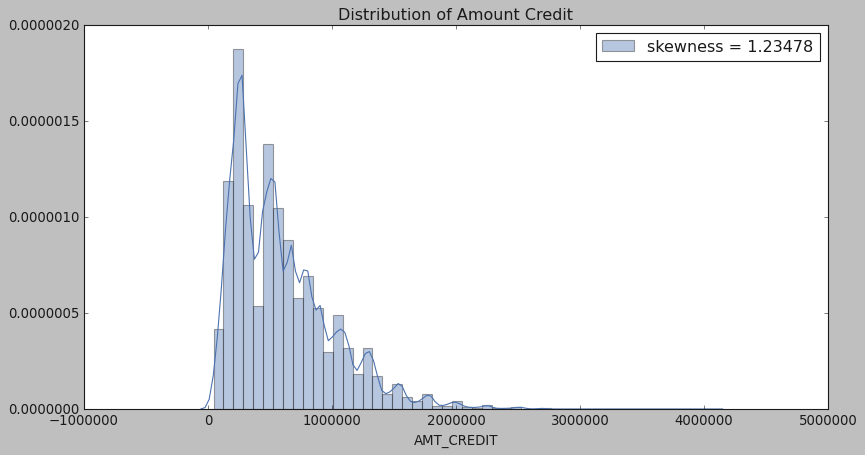

In [25]:
plt.style.use('classic')
plt.figure(figsize=(12, 6))

ax = sns.distplot(app_train['AMT_CREDIT'])
plt.title('Distribution of Amount Credit')
skewness = app_train['AMT_CREDIT'].skew()
plt.legend(['skewness = {:.5f}'.format(skewness)],
            loc='best')
plt.show()

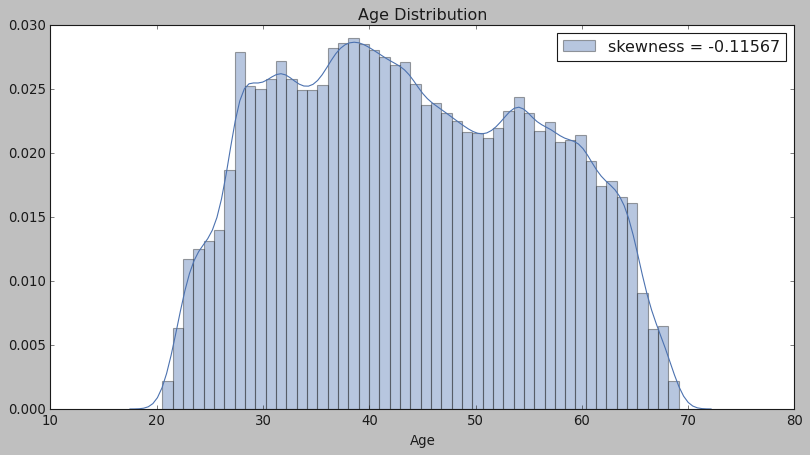

In [26]:
plt.figure(figsize=(12, 6))

sns.distplot(abs(app_train['DAYS_BIRTH']/365))
plt.title('Age Distribution')
plt.xlabel('Age')
skewness = app_train['DAYS_BIRTH'].skew()
plt.legend(['skewness = {:.5f}'.format(skewness)],
            loc='best')
plt.show()

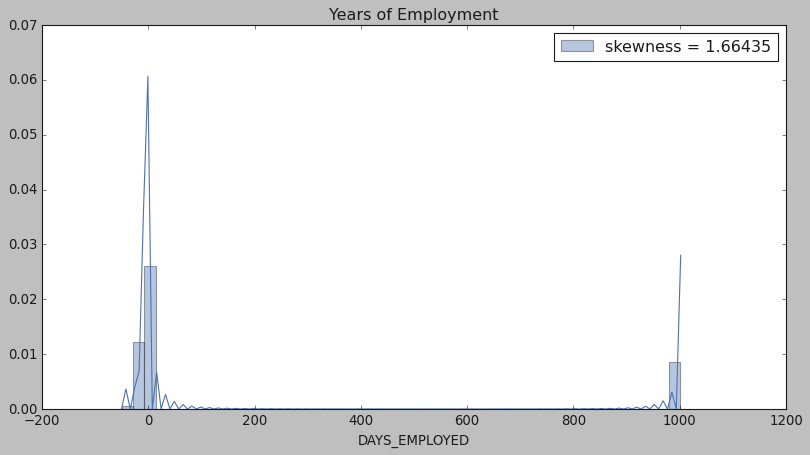

In [27]:

plt.figure(figsize=(12, 6))

sns.distplot(app_train['DAYS_EMPLOYED']/365)
plt.title('Years of Employment')
skewness = app_train['DAYS_EMPLOYED'].skew()
plt.legend(['skewness = {:.5f}'.format(skewness)],
            loc='best')

plt.show()

This is strange. How can a person is employed for more than 800 years?

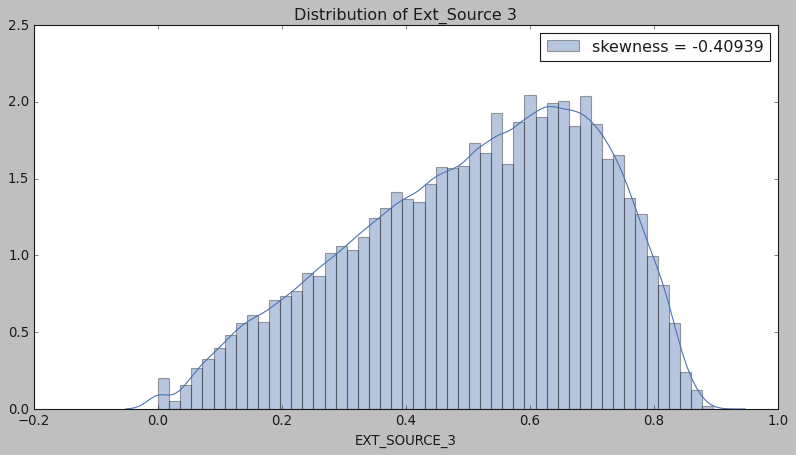

In [28]:
plt.figure(figsize=(12, 6))

ax = sns.distplot(app_train['EXT_SOURCE_3'].dropna())
plt.title('Distribution of Ext_Source 3')
skewness = app_train['EXT_SOURCE_3'].skew()
plt.legend(['skewness = {:.5f}'.format(skewness)],
            loc='best')
plt.show()

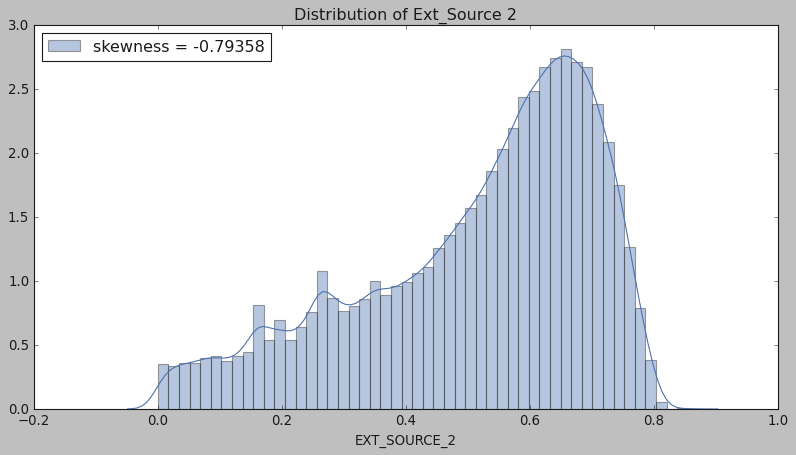

In [29]:
plt.figure(figsize=(12, 6))

ax = sns.distplot(app_train['EXT_SOURCE_2'].dropna())
plt.title('Distribution of Ext_Source 2')

skewness = app_train['EXT_SOURCE_2'].skew()
plt.legend(['skewness = {:.5f}'.format(skewness)],
            loc='best')
plt.show()

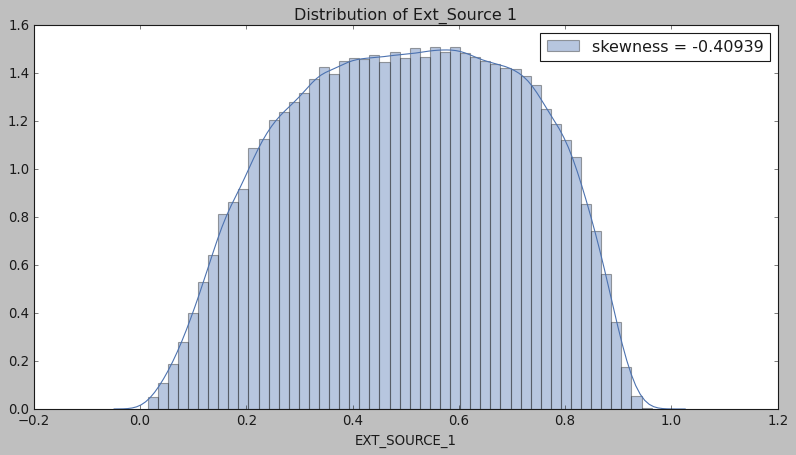

In [30]:
plt.figure(figsize=(12, 6))

ax = sns.distplot(app_train['EXT_SOURCE_1'].dropna())
plt.title('Distribution of Ext_Source 1')
skewness = app_train['EXT_SOURCE_3'].skew()
plt.legend(['skewness = {:.5f}'.format(skewness)],
            loc='best')
plt.show()

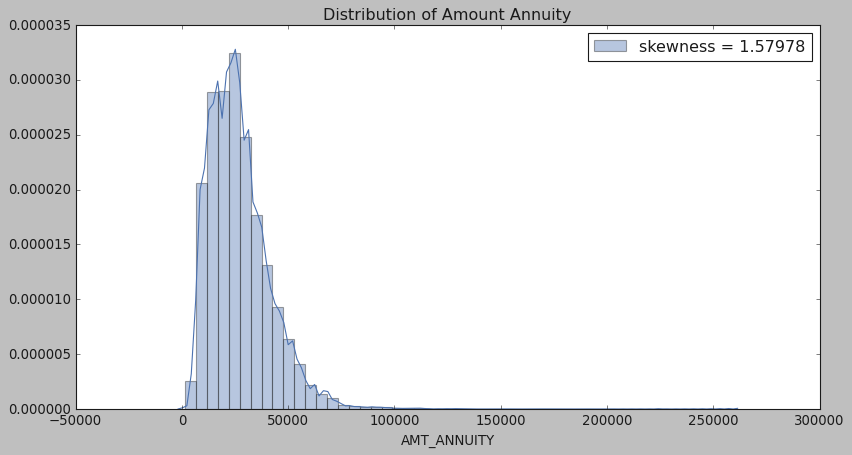

In [31]:
plt.figure(figsize=(12, 6))

ax = sns.distplot(app_train['AMT_ANNUITY'].dropna())
plt.title('Distribution of Amount Annuity')
skewness = app_train['AMT_ANNUITY'].skew()
plt.legend(['skewness = {:.5f}'.format(skewness)],
            loc='best')
plt.show()

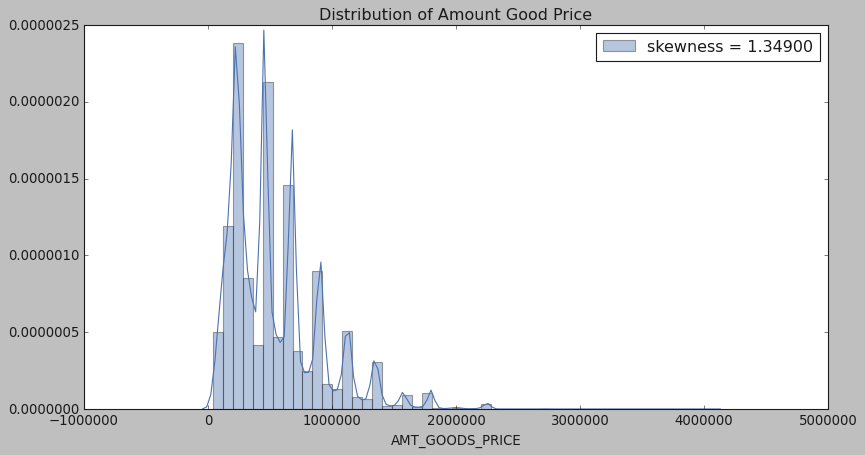

In [32]:
plt.figure(figsize=(12, 6))

ax = sns.distplot(app_train['AMT_GOODS_PRICE'].dropna())
plt.title('Distribution of Amount Good Price')
skewness = app_train['AMT_GOODS_PRICE'].skew()
plt.legend(['skewness = {:.5f}'.format(skewness)],
            loc='best')
plt.show()


We have skewness problem in the dataset.

## Target And Numeric Variables

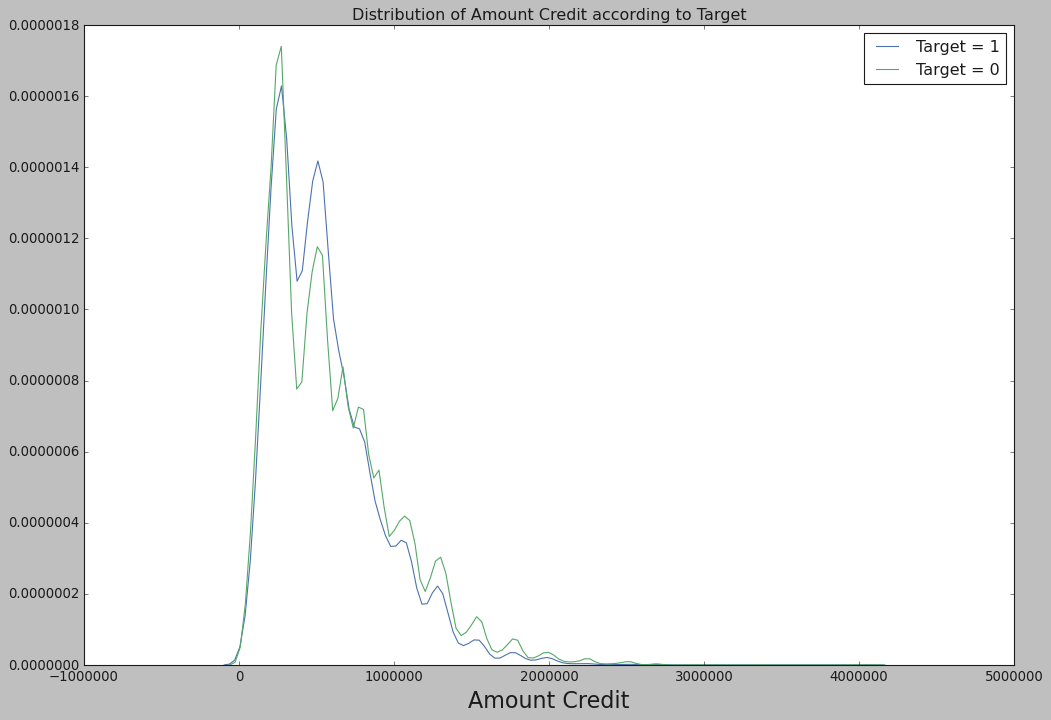

In [33]:
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-deep')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_CREDIT'], label = 'Target = 1')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'Target = 0')
plt.title('Distribution of Amount Credit according to Target')
plt.xlabel('Amount Credit', fontsize = 20)
plt.show()


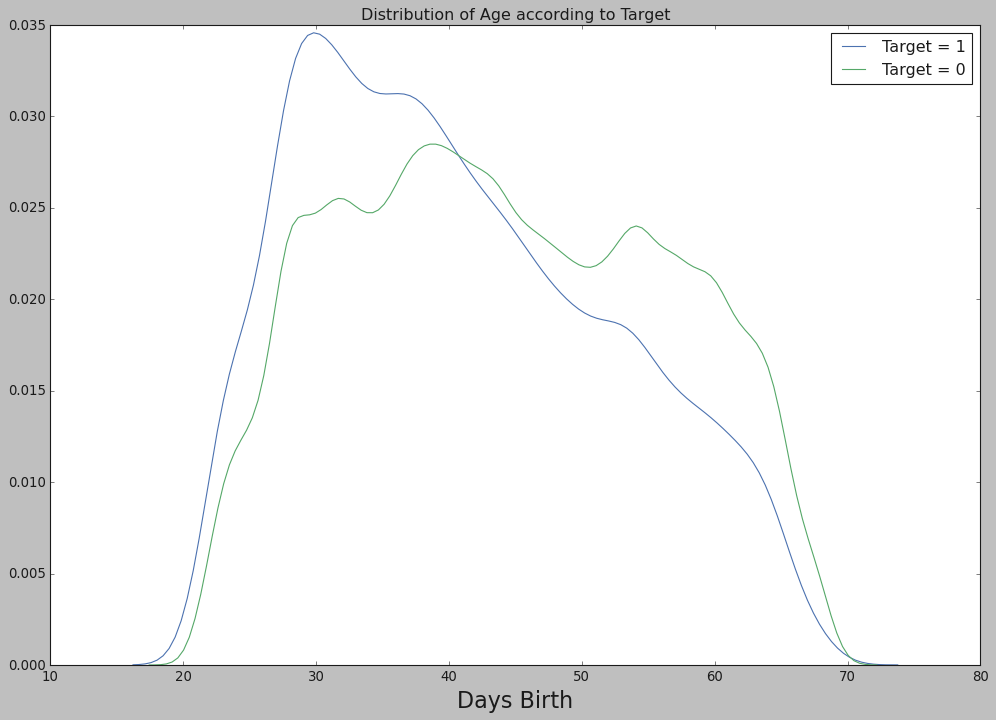

In [34]:
plt.figure(figsize=(15, 10))

sns.kdeplot(abs(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365), label = 'Target = 1')
sns.kdeplot(abs(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365), label = 'Target = 0')
plt.title('Distribution of Age according to Target')
plt.xlabel('Days Birth', fontsize = 20)
plt.show()

As the people get older, they tend to pay their loans according to this graph. We will explore their relation in a while.

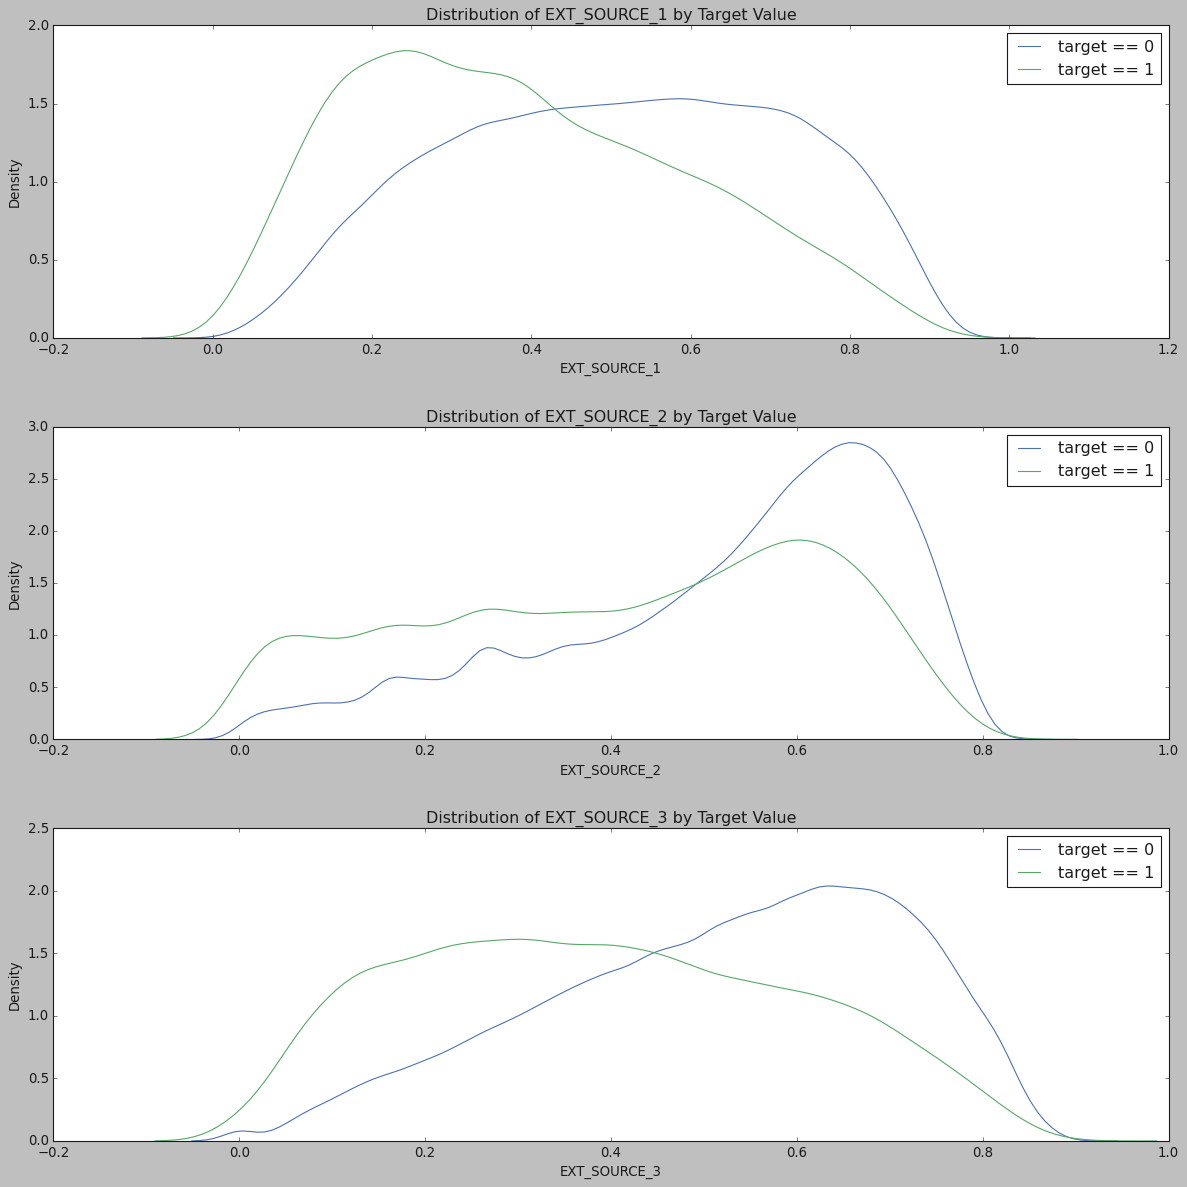

In [35]:
plt.figure(figsize = (15, 15))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    plt.subplot(3, 1, i + 1)
    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

We can see alot of differences in the behavior of EXT_SOURCE variables according to their target status. These variables will be useful in our model

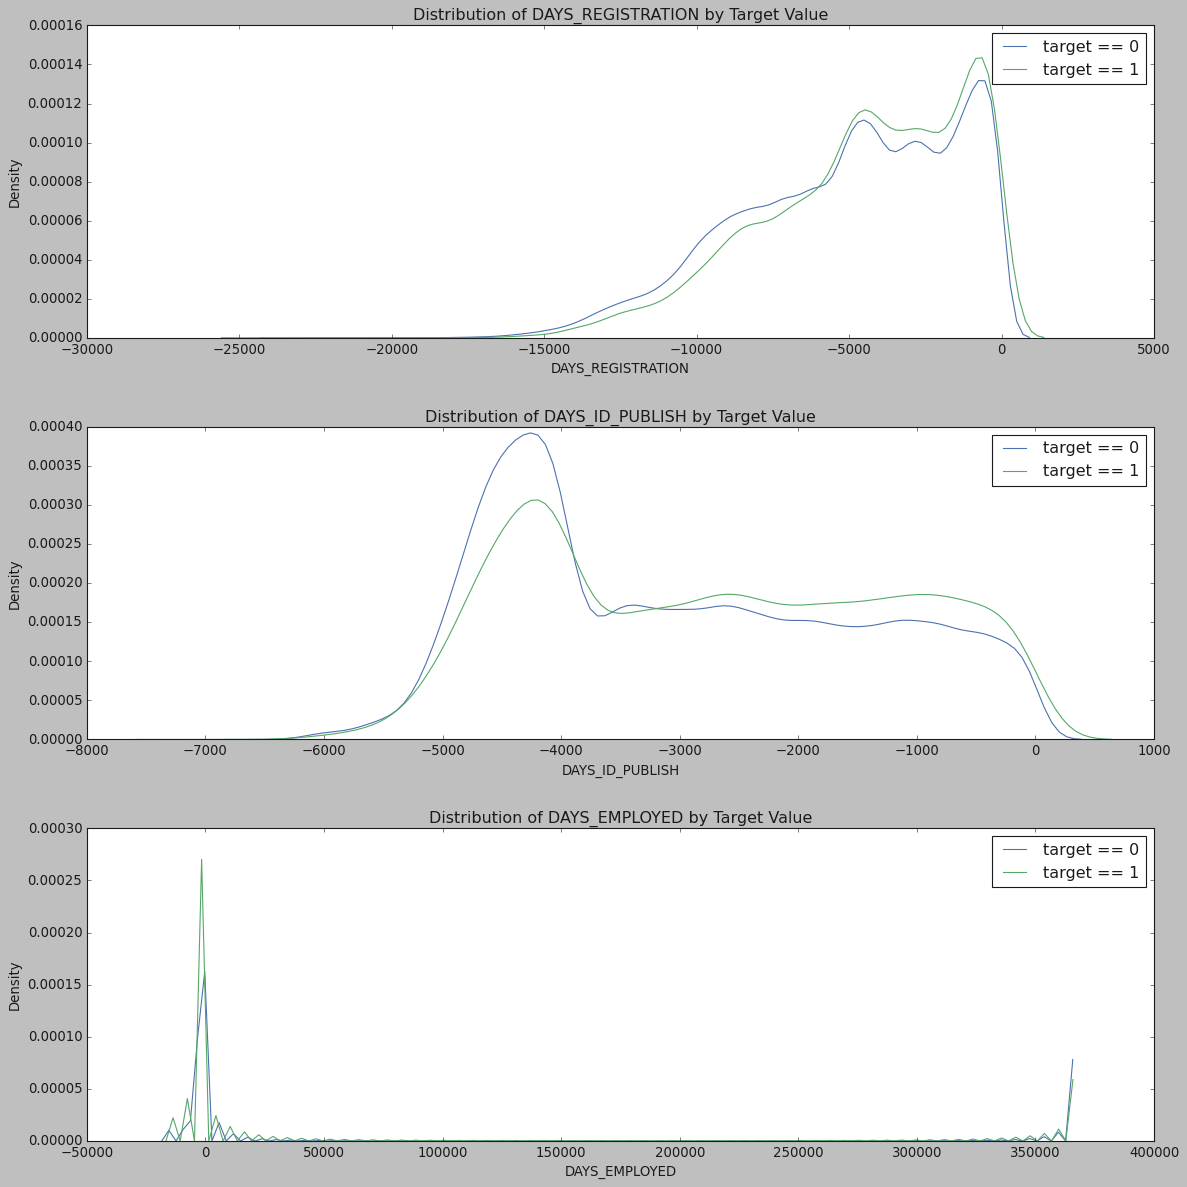

In [36]:
plt.figure(figsize = (15, 15))

# iterate through the sources
for i, source in enumerate(['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED']):
    
    plt.subplot(3, 1, i + 1)
    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

Why data related to days are in negative? Lets fix this with the help of abs function that will convert the signs

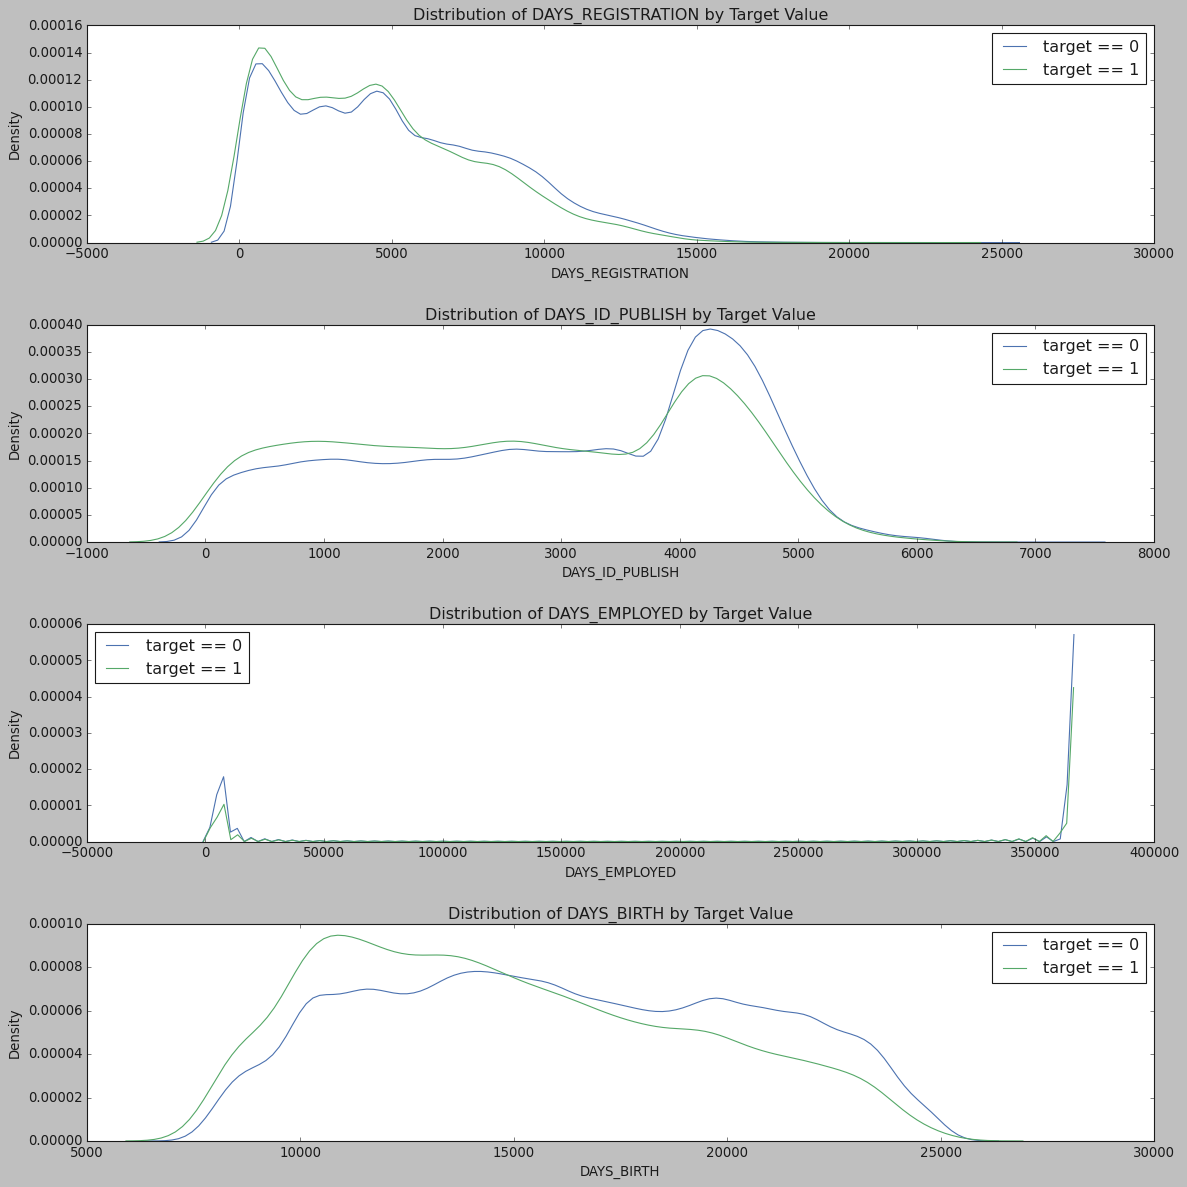

In [37]:
plt.figure(figsize = (15, 15))

# iterate through the sources
for i, source in enumerate(['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED',
                           'DAYS_BIRTH']):
    
    plt.subplot(4, 1, i + 1)
    
    sns.kdeplot(abs(app_train.loc[app_train['TARGET'] == 0, source]), label = 'target == 0')
    
    sns.kdeplot(abs(app_train.loc[app_train['TARGET'] == 1, source]), label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source);
    plt.ylabel('Density');
plt.tight_layout(h_pad=2)

Now it makes more sense. But we still have the issue. We will simply impute Nas where days are in negative

### Practice Data preparation

In [38]:
print(app_train.shape)
print(app_test.shape)

(307511, 122)
(48744, 121)


In [39]:

y = app_train['TARGET']

ntrain = app_train.shape[0]
ntest = app_test.shape[0]

train = app_train.drop(['TARGET'], axis=1)
test = app_test.copy()

application_data = pd.concat((train, test)).reset_index(drop=True)
application_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Fixing issues

In [40]:
cols = ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED','DAYS_BIRTH',
        'DAYS_LAST_PHONE_CHANGE']
for c in cols:
    application_data[c] = abs(application_data[c])
    
application_data[cols].describe()

,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE
count,356255.000000,356255.000000,356255.000000,356255.000000,356254.000000
mean,4983.593527,3002.071163,68240.792834,16041.248841,978.580852
std,3526.968986,1517.901735,139858.346025,4358.803980,835.063902
min,0.000000,0.000000,0.000000,7338.000000,0.000000
25%,1995.000000,1717.000000,949.000000,12425.000000,286.000000
50%,4502.000000,3252.000000,2243.000000,15755.000000,771.000000
75%,7477.000000,4318.000000,5773.000000,19676.000000,1592.000000
max,24672.000000,7197.000000,365243.000000,25229.000000,4361.000000


In [41]:
cols = ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED','DAYS_BIRTH',
        'DAYS_LAST_PHONE_CHANGE']
for c in cols:
    application_data[c] = application_data[c]/365

application_data[cols].describe()

,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE
count,356255.000000,356255.000000,356255.000000,356255.000000,356254.000000
mean,13.653681,8.224853,186.961076,43.948627,2.681043
std,9.662929,4.158635,383.173551,11.941929,2.287846
min,0.000000,0.000000,0.000000,20.104110,0.000000
25%,5.465753,4.704110,2.600000,34.041096,0.783562
50%,12.334247,8.909589,6.145205,43.164384,2.112329
75%,20.484932,11.830137,15.816438,53.906849,4.361644
max,67.594521,19.717808,1000.665753,69.120548,11.947945


In [42]:
application_data['DAYS_EMPLOYED'] = np.where(application_data['DAYS_EMPLOYED'] > 800, np.nan,
                                            application_data['DAYS_EMPLOYED'])
application_data['DAYS_EMPLOYED'].describe()

count    291607.000000
mean          6.566298
std           6.395836
min           0.000000
25%           2.136986
50%           4.556164
75%           8.767123
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [43]:
application_data['FLAG_OWN_CAR'] = np.where(application_data['FLAG_OWN_CAR'] =="Y", 1, 0)
application_data['FLAG_OWN_REALTY'] = np.where(application_data['FLAG_OWN_REALTY'] =="Y", 1, 0)
cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
application_data[cols].describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY
count,356255.000000,356255.000000
mean,0.339700,0.693239
std,0.473608,0.461150
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [44]:
application_data['ORGANIZATION_TYPE'] = application_data.drop('ORGANIZATION_TYPE', axis=1)

In [45]:
lbl = LabelEncoder()
cat = application_data.select_dtypes(include=['object'])
cols = cat.columns.values.tolist()

for c in cols:
    lbl.fit(list(application_data[c].values))
    application_data[c] = lbl.transform(list(application_data[c].values))
    


# Data Joining

## Data Joining And Aggregation

In [46]:
## Create your function to clean the data and return aggregated result

def aggregate(data, by):
    ## Get categorical column names
    cat = data.select_dtypes(include=['object'])
    cols = cat.columns.values.tolist()
    
    ## loop through cat columns for label encoding
    
    for i in cols:
        lbl = LabelEncoder() 
        lbl.fit(list(data[i].values)) 
        data[i] = lbl.transform(list(data[i].values))   
    new_data = data.groupby(by).agg([sum, np.mean, np.std, min, max]) 
    # add _ in column names followed by the function applied
    new_data.columns = ["_".join(x) for x in new_data.columns.ravel()]
    new_data = new_data.reset_index()
    return(new_data)

## Bureau dataset

In [47]:
nas = bureau_bal.isna().sum()
nas

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [48]:
sum_bureau_bal = aggregate(bureau_bal, by='SK_ID_BUREAU')
print(sum_bureau_bal.shape)
sum_bureau_bal.head()

(817395, 11)


,SK_ID_BUREAU,MONTHS_BALANCE_sum,MONTHS_BALANCE_mean,MONTHS_BALANCE_std,MONTHS_BALANCE_min,MONTHS_BALANCE_max,STATUS_sum,STATUS_mean,STATUS_std,STATUS_min,STATUS_max
0,5001709,-4656,-48.0,28.145456,-96,0,593,6.113402,0.318731,6,7
1,5001710,-3403,-41.0,24.103942,-82,0,498,6.000000,1.600305,0,7
2,5001711,-6,-1.5,1.290994,-3,0,7,1.750000,3.500000,0,7
3,5001712,-171,-9.0,5.627314,-18,0,54,2.842105,3.077935,0,6
4,5001713,-231,-10.5,6.493587,-21,0,154,7.000000,0.000000,7,7


In [49]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [50]:
bureau_data = pd.merge(bureau, sum_bureau_bal, on= 'SK_ID_BUREAU', how = 'left')
print(bureau_data.shape)
bureau_data.head()

(1716428, 27)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_sum,MONTHS_BALANCE_mean,MONTHS_BALANCE_std,MONTHS_BALANCE_min,MONTHS_BALANCE_max,STATUS_sum,STATUS_mean,STATUS_std,STATUS_min,STATUS_max
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
bureau_data.drop('SK_ID_BUREAU', axis=True, inplace=True)
average_bureau_data = aggregate(bureau_data, by='SK_ID_CURR')

print(average_bureau_data.shape)
average_bureau_data.head()

(305811, 126)


,SK_ID_CURR,CREDIT_ACTIVE_sum,CREDIT_ACTIVE_mean,CREDIT_ACTIVE_std,CREDIT_ACTIVE_min,CREDIT_ACTIVE_max,CREDIT_CURRENCY_sum,CREDIT_CURRENCY_mean,CREDIT_CURRENCY_std,CREDIT_CURRENCY_min,CREDIT_CURRENCY_max,DAYS_CREDIT_sum,DAYS_CREDIT_mean,DAYS_CREDIT_std,DAYS_CREDIT_min,DAYS_CREDIT_max,CREDIT_DAY_OVERDUE_sum,CREDIT_DAY_OVERDUE_mean,CREDIT_DAY_OVERDUE_std,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,DAYS_CREDIT_ENDDATE_sum,DAYS_CREDIT_ENDDATE_mean,DAYS_CREDIT_ENDDATE_std,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_ENDDATE_FACT_sum,DAYS_ENDDATE_FACT_mean,DAYS_ENDDATE_FACT_std,DAYS_ENDDATE_FACT_min,DAYS_ENDDATE_FACT_max,AMT_CREDIT_MAX_OVERDUE_sum,AMT_CREDIT_MAX_OVERDUE_mean,AMT_CREDIT_MAX_OVERDUE_std,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_MAX_OVERDUE_max,CNT_CREDIT_PROLONG_sum,CNT_CREDIT_PROLONG_mean,CNT_CREDIT_PROLONG_std,CNT_CREDIT_PROLONG_min,CNT_CREDIT_PROLONG_max,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_std,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_std,AMT_CREDIT_SUM_DEBT_min,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_LIMIT_sum,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_LIMIT_std,AMT_CREDIT_SUM_LIMIT_min,AMT_CREDIT_SUM_LIMIT_max,AMT_CREDIT_SUM_OVERDUE_sum,AMT_CREDIT_SUM_OVERDUE_mean,AMT_CREDIT_SUM_OVERDUE_std,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,CREDIT_TYPE_sum,CREDIT_TYPE_mean,CREDIT_TYPE_std,CREDIT_TYPE_min,CREDIT_TYPE_max,DAYS_CREDIT_UPDATE_sum,DAYS_CREDIT_UPDATE_mean,DAYS_CREDIT_UPDATE_std,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,AMT_ANNUITY_sum,AMT_ANNUITY_mean,AMT_ANNUITY_std,AMT_ANNUITY_min,AMT_ANNUITY_max,MONTHS_BALANCE_sum_sum,MONTHS_BALANCE_sum_mean,MONTHS_BALANCE_sum_std,MONTHS_BALANCE_sum_min,MONTHS_BALANCE_sum_max,MONTHS_BALANCE_mean_sum,MONTHS_BALANCE_mean_mean,MONTHS_BALANCE_mean_std,MONTHS_BALANCE_mean_min,MONTHS_BALANCE_mean_max,MONTHS_BALANCE_std_sum,MONTHS_BALANCE_std_mean,MONTHS_BALANCE_std_std,MONTHS_BALANCE_std_min,MONTHS_BALANCE_std_max,MONTHS_BALANCE_min_sum,MONTHS_BALANCE_min_mean,MONTHS_BALANCE_min_std,MONTHS_BALANCE_min_min,MONTHS_BALANCE_min_max,MONTHS_BALANCE_max_sum,MONTHS_BALANCE_max_mean,MONTHS_BALANCE_max_std,MONTHS_BALANCE_max_min,MONTHS_BALANCE_max_max,STATUS_sum_sum,STATUS_sum_mean,STATUS_sum_std,STATUS_sum_min,STATUS_sum_max,STATUS_mean_sum,STATUS_mean_mean,STATUS_mean_std,STATUS_mean_min,STATUS_mean_max,STATUS_std_sum,STATUS_std_mean,STATUS_std_std,STATUS_std_min,STATUS_std_max,STATUS_min_sum,STATUS_min_mean,STATUS_min_std,STATUS_min_min,STATUS_min_max,STATUS_max_sum,STATUS_max_mean,STATUS_max_std,STATUS_max_min,STATUS_max_max
0,100001,8,1.142857,1.069045,0,2,0,0.0,0.0,0,0,-5145,-735.000000,489.942514,-1572,-49,0,0.0,0.0,0,0,577.0,82.428571,1032.859277,-1329.0,1778.0,-3302.0,-825.500000,369.078582,-1328.0,-544.0,0.000,NaN,NaN,NaN,NaN,0,0.0,0.0,0,0,1453365.000,207623.571429,122544.544510,85500.0,378000.0,596686.5,85240.928571,137485.631124,0.0,373239.0,0.000,0.00000,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,21,3.000000,0.000000,3,3,-652,-93.142857,77.204120,-155,-6,24817.5,3545.357143,4800.607529,0.0,10822.5,-2800.0,-400.000000,445.241507,-1326.0,-1.0,-82.5,-11.785714,8.025258,-25.5,-0.5,50.638598,7.234085,4.636978,0.707107,15.154757,-165.0,-23.571429,16.050515,-51.0,-1.0,0.0,0.0,0.000000,0.0,0.0,871.0,124.428571,113.707017,0.0,313.0,29.099630,4.157090,2.332192,0.0,6.019231,13.964274,1.994896,1.658706,0.00000,4.949747,0.0,0.0,0.0,0.0,0.0,41.0,5.857143,2.609506,0.0,7.0
1,100002,12,1.500000,0.925820,0,2,0,0.0,0.0,0,0,-6992,-874.000000,431.451040,-1437,-103,0,0.0,0.0,0,0,-2094.0,-349.000000,767.490977,-1072.0,780.0,-4185.0,-697.500000,515.992539,-1185.0,-36.0,8405.145,1681.029,2363.2469,0.0,5043.645,0,0.0,0.0,0,0,865055.565,108131.945625,146075.557435,0.0,450000.0,245781.0,49156.200000,109916.604716,0.0,245781.0,31988.565,7997.14125,15994.2825,0.0,31988.565,0.0,0.0,0.0,0.0,0.0,28,3.500000,0.534522,3,4,-3999,-499.875000,518.522472,-1185,-7,0.0,0.000000,0.000000,0.0,0.0,-2701.0,-337.625000,236.10768

## Cash Dataset

In [52]:
print(cash_bal.shape)
cash_bal.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [53]:
cash_bal = cash_bal.drop(['SK_ID_PREV'], axis=1)
agg_cash_bal = aggregate(cash_bal, by='SK_ID_CURR')
print(agg_cash_bal.shape)
agg_cash_bal.head()

(337252, 31)


,SK_ID_CURR,MONTHS_BALANCE_sum,MONTHS_BALANCE_mean,MONTHS_BALANCE_std,MONTHS_BALANCE_min,MONTHS_BALANCE_max,CNT_INSTALMENT_sum,CNT_INSTALMENT_mean,CNT_INSTALMENT_std,CNT_INSTALMENT_min,CNT_INSTALMENT_max,CNT_INSTALMENT_FUTURE_sum,CNT_INSTALMENT_FUTURE_mean,CNT_INSTALMENT_FUTURE_std,CNT_INSTALMENT_FUTURE_min,CNT_INSTALMENT_FUTURE_max,NAME_CONTRACT_STATUS_sum,NAME_CONTRACT_STATUS_mean,NAME_CONTRACT_STATUS_std,NAME_CONTRACT_STATUS_min,NAME_CONTRACT_STATUS_max,SK_DPD_sum,SK_DPD_mean,SK_DPD_std,SK_DPD_min,SK_DPD_max,SK_DPD_DEF_sum,SK_DPD_DEF_mean,SK_DPD_DEF_std,SK_DPD_DEF_min,SK_DPD_DEF_max
0,100001,-653,-72.555556,20.863312,-96,-53,36.0,4.000000,0.000000,4.0,4.0,13.0,1.444444,1.424001,0.0,4.0,8,0.888889,1.763834,0,4,7,0.777778,2.333333,0,7,7,0.777778,2.333333,0,7
1,100002,-190,-10.000000,5.627314,-19,-1,456.0,24.000000,0.000000,24.0,24.0,285.0,15.000000,5.627314,6.0,24.0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0
2,100003,-1226,-43.785714,24.640162,-77,-18,283.0,10.107143,2.806597,6.0,12.0,162.0,5.785714,3.842811,0.0,12.0,8,0.285714,1.049061,0,4,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0
3,100004,-102,-25.500000,1.290994,-27,-24,15.0,3.750000,0.500000,3.0,4.0,9.0,2.250000,1.707825,0.0,4.0,4,1.000000,2.000000,0,4,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0
4,100005,-220,-20.000000,3.316625,-25,-15,117.0,11.700000,0.948683,9.0,12.0,72.0,7.200000,3.614784,0.0,12.0,11,1.000000,2.323790,0,7,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0


## Previous Application Dataset

In [54]:
print(prev_application.shape)
prev_application.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
prev_application = prev_application.drop(['SK_ID_PREV'], axis=1)
agg_prev_app = aggregate(prev_application, by='SK_ID_CURR')
print(agg_prev_app.shape)
agg_prev_app.head()

(338857, 176)


,SK_ID_CURR,NAME_CONTRACT_TYPE_sum,NAME_CONTRACT_TYPE_mean,NAME_CONTRACT_TYPE_std,NAME_CONTRACT_TYPE_min,NAME_CONTRACT_TYPE_max,AMT_ANNUITY_sum,AMT_ANNUITY_mean,AMT_ANNUITY_std,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_APPLICATION_sum,AMT_APPLICATION_mean,AMT_APPLICATION_std,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_CREDIT_sum,AMT_CREDIT_mean,AMT_CREDIT_std,AMT_CREDIT_min,AMT_CREDIT_max,AMT_DOWN_PAYMENT_sum,AMT_DOWN_PAYMENT_mean,AMT_DOWN_PAYMENT_std,AMT_DOWN_PAYMENT_min,AMT_DOWN_PAYMENT_max,AMT_GOODS_PRICE_sum,AMT_GOODS_PRICE_mean,AMT_GOODS_PRICE_std,AMT_GOODS_PRICE_min,AMT_GOODS_PRICE_max,WEEKDAY_APPR_PROCESS_START_sum,WEEKDAY_APPR_PROCESS_START_mean,WEEKDAY_APPR_PROCESS_START_std,WEEKDAY_APPR_PROCESS_START_min,WEEKDAY_APPR_PROCESS_START_max,HOUR_APPR_PROCESS_START_sum,HOUR_APPR_PROCESS_START_mean,HOUR_APPR_PROCESS_START_std,HOUR_APPR_PROCESS_START_min,HOUR_APPR_PROCESS_START_max,FLAG_LAST_APPL_PER_CONTRACT_sum,FLAG_LAST_APPL_PER_CONTRACT_mean,FLAG_LAST_APPL_PER_CONTRACT_std,FLAG_LAST_APPL_PER_CONTRACT_min,FLAG_LAST_APPL_PER_CONTRACT_max,NFLAG_LAST_APPL_IN_DAY_sum,NFLAG_LAST_APPL_IN_DAY_mean,NFLAG_LAST_APPL_IN_DAY_std,NFLAG_LAST_APPL_IN_DAY_min,NFLAG_LAST_APPL_IN_DAY_max,RATE_DOWN_PAYMENT_sum,RATE_DOWN_PAYMENT_mean,RATE_DOWN_PAYMENT_std,RATE_DOWN_PAYMENT_min,RATE_DOWN_PAYMENT_max,RATE_INTEREST_PRIMARY_sum,RATE_INTEREST_PRIMARY_mean,RATE_INTEREST_PRIMARY_std,RATE_INTEREST_PRIMARY_min,RATE_INTEREST_PRIMARY_max,RATE_INTEREST_PRIVILEGED_sum,RATE_INTEREST_PRIVILEGED_mean,RATE_INTEREST_PRIVILEGED_std,RATE_INTEREST_PRIVILEGED_min,RATE_INTEREST_PRIVILEGED_max,NAME_CASH_LOAN_PURPOSE_sum,NAME_CASH_LOAN_PURPOSE_mean,NAME_CASH_LOAN_PURPOSE_std,NAME_CASH_LOAN_PURPOSE_min,NAME_CASH_LOAN_PURPOSE_max,NAME_CONTRACT_STATUS_sum,NAME_CONTRACT_STATUS_mean,NAME_CONTRACT_STATUS_std,NAME_CONTRACT_STATUS_min,NAME_CONTRACT_STATUS_max,DAYS_DECISION_sum,DAYS_DECISION_mean,DAYS_DECISION_std,DAYS_DECISION_min,DAYS_DECISION_max,NAME_PAYMENT_TYPE_sum,NAME_PAYMENT_TYPE_mean,NAME_PAYMENT_TYPE_std,NAME_PAYMENT_TYPE_min,NAME_PAYMENT_TYPE_max,CODE_REJECT_REASON_sum,CODE_REJECT_REASON_mean,CODE_REJECT_REASON_std,CODE_REJECT_REASON_min,CODE_REJECT_REASON_max,NAME_TYPE_SUITE_sum,NAME_TYPE_SUITE_mean,NAME_TYPE_SUITE_std,NAME_TYPE_SUITE_min,NAME_TYPE_SUITE_max,NAME_CLIENT_TYPE_sum,NAME_CLIENT_TYPE_mean,NAME_CLIENT_TYPE_std,NAME_CLIENT_TYPE_min,NAME_CLIENT_TYPE_max,NAME_GOODS_CATEGORY_sum,NAME_GOODS_CATEGORY_mean,NAME_GOODS_CATEGORY_std,NAME_GOODS_CATEGORY_min,NAME_GOODS_CATEGORY_max,NAME_PORTFOLIO_sum,NAME_PORTFOLIO_mean,NAME_PORTFOLIO_std,NAME_PORTFOLIO_min,NAME_PORTFOLIO_max,NAME_PRODUCT_TYPE_sum,NAME_PRODUCT_TYPE_mean,NAME_PRODUCT_TYPE_std,NAME_PRODUCT_TYPE_min,NAME_PRODUCT_TYPE_max,CHANNEL_TYPE_sum,CHANNEL_TYPE_mean,CHANNEL_TYPE_std,CHANNEL_TYPE_min,CHANNEL_TYPE_max,SELLERPLACE_AREA_sum,SELLERPLACE_AREA_mean,SELLERPLACE_AREA_std,SELLERPLACE_AREA_min,SELLERPLACE_AREA_max,NAME_SELLER_INDUSTRY_sum,NAME_SELLER_INDUSTRY_mean,NAME_SELLER_INDUSTRY_std,NAME_SELLER_INDUSTRY_min,NAME_SELLER_INDUSTRY_max,CNT_PAYMENT_sum,CNT_PAYMENT_mean,CNT_PAYMENT_std,CNT_PAYMENT_min,CNT_PAYMENT_max,NAME_YIELD_GROUP_sum,NAME_YIELD_GROUP_mean,NAME_YIELD_GROUP_std,NAME_YIELD_GROUP_min,NAME_YIELD_GROUP_max,PRODUCT_COMBINATION_sum,PRODUCT_COMBINATION_mean,PRODUCT_COMBINATION_std,PRODUCT_COMBINATION_min,PRODUCT_COMBINATION_max,DAYS_FIRST_DRAWING_sum,DAYS_FIRST_DRAWING_mean,DAYS_FIRST_DRAWING_std,DAYS_FIRST_DRAWING_min,DAYS_FIRST_DRAWING_max,DAYS_FIRST_DUE_sum,DAYS_FIRST_DUE_mean,DAYS_FIRST_DUE_std,DAYS_FIRST_DUE_min,DAYS_FIRST_DUE_max,DAYS_LAST_DUE_1ST_VERSION_sum,DAYS_LAST_DUE_1ST_VERSION_mean,DAYS_LAST_DUE_1ST_VERSION_std,DAYS_LAST_DUE_1ST_VERSION_min,DAYS_LAST_DUE_1ST_VERSION_max,DAYS_LAST_DUE_sum,DAYS_LAST_DUE_mean,DAYS_LAST_DUE_std,DAYS_LAST_DUE_min,DAYS_LAST_DUE_max,DAYS_TERMINATION_sum,DAYS_TERMINATION_mean,DAYS_TERMINATION_std,DAYS_TERMINATION_min,DAYS_TERMINATION_max,NFLAG_INSURED_ON_APPROVAL_sum,NFLAG_INSURED_ON_APPROVAL_mean,NFLAG_INSURED_ON_APPROVAL_std,NFLAG_INSURED_ON_APPROVAL_min,NFL

## Installment Payments Dataset

In [56]:
print(installment_payment.shape)
installment_payment.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [57]:
installment_payment = installment_payment.drop(['SK_ID_PREV'], axis=1)
agg_ins_pay = aggregate(installment_payment, by='SK_ID_CURR')
print(agg_ins_pay.shape)
agg_ins_pay.head()

(339587, 31)


,SK_ID_CURR,NUM_INSTALMENT_VERSION_sum,NUM_INSTALMENT_VERSION_mean,NUM_INSTALMENT_VERSION_std,NUM_INSTALMENT_VERSION_min,NUM_INSTALMENT_VERSION_max,NUM_INSTALMENT_NUMBER_sum,NUM_INSTALMENT_NUMBER_mean,NUM_INSTALMENT_NUMBER_std,NUM_INSTALMENT_NUMBER_min,NUM_INSTALMENT_NUMBER_max,DAYS_INSTALMENT_sum,DAYS_INSTALMENT_mean,DAYS_INSTALMENT_std,DAYS_INSTALMENT_min,DAYS_INSTALMENT_max,DAYS_ENTRY_PAYMENT_sum,DAYS_ENTRY_PAYMENT_mean,DAYS_ENTRY_PAYMENT_std,DAYS_ENTRY_PAYMENT_min,DAYS_ENTRY_PAYMENT_max,AMT_INSTALMENT_sum,AMT_INSTALMENT_mean,AMT_INSTALMENT_std,AMT_INSTALMENT_min,AMT_INSTALMENT_max,AMT_PAYMENT_sum,AMT_PAYMENT_mean,AMT_PAYMENT_std,AMT_PAYMENT_min,AMT_PAYMENT_max
0,100001,8.0,1.142857,0.377964,1.0,2.0,19,2.714286,1.112697,1,4,-15314.0,-2187.714286,653.989733,-2916.0,-1619.0,-15365.0,-2195.000000,643.904237,-2916.0,-1628.0,41195.925,5885.132143,5076.676624,3951.000,17397.900,41195.925,5885.132143,5076.676624,3951.000,17397.900
1,100002,20.0,1.052632,0.229416,1.0,2.0,190,10.000000,5.627314,1,19,-5605.0,-295.000000,168.819430,-565.0,-25.0,-5993.0,-315.421053,172.058877,-587.0,-49.0,219625.695,11559.247105,10058.037722,9251.775,53093.745,219625.695,11559.247105,10058.037722,9251.775,53093.745
2,100003,26.0,1.040000,0.200000,1.0,2.0,127,5.080000,3.134751,1,12,-34454.0,-1378.160000,757.453556,-2310.0,-536.0,-34633.0,-1385.320000,757.325432,-2324.0,-544.0,1618864.650,64754.586000,110542.592300,6662.970,560835.360,1618864.650,64754.586000,110542.592300,6662.970,560835.360
3,100004,4.0,1.333333,0.577350,1.0,2.0,6,2.000000,1.000000,1,3,-2262.0,-754.000000,30.000000,-784.0,-724.0,-2285.0,-761.666667,34.019602,-795.0,-727.0,21288.465,7096.155000,3011.871810,5357.250,10573.965,21288.465,7096.155000,3011.871810,5357.250,10573.965
4,100005,10.0,1.111111,0.333333,1.0,2.0,45,5.000000,2.738613,1,9,-5274.0,-586.000000,82.158384,-706.0,-466.0,-5486.0,-609.555556,90.554005,-736.0,-470.0,56161.845,6240.205000,4281.015000,4813.200,17656.245,56161.845,6240.205000,4281.015000,4813.200,17656.245


## Credit Balance Data

In [58]:
credit_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [59]:
credit_bal.drop('SK_ID_PREV', axis=1, inplace=True)
agg_credit_bal = aggregate(credit_bal, by= 'SK_ID_CURR')
print(agg_credit_bal.shape)
agg_credit_bal.head()

(103558, 106)


,SK_ID_CURR,MONTHS_BALANCE_sum,MONTHS_BALANCE_mean,MONTHS_BALANCE_std,MONTHS_BALANCE_min,MONTHS_BALANCE_max,AMT_BALANCE_sum,AMT_BALANCE_mean,AMT_BALANCE_std,AMT_BALANCE_min,AMT_BALANCE_max,AMT_CREDIT_LIMIT_ACTUAL_sum,AMT_CREDIT_LIMIT_ACTUAL_mean,AMT_CREDIT_LIMIT_ACTUAL_std,AMT_CREDIT_LIMIT_ACTUAL_min,AMT_CREDIT_LIMIT_ACTUAL_max,AMT_DRAWINGS_ATM_CURRENT_sum,AMT_DRAWINGS_ATM_CURRENT_mean,AMT_DRAWINGS_ATM_CURRENT_std,AMT_DRAWINGS_ATM_CURRENT_min,AMT_DRAWINGS_ATM_CURRENT_max,AMT_DRAWINGS_CURRENT_sum,AMT_DRAWINGS_CURRENT_mean,AMT_DRAWINGS_CURRENT_std,AMT_DRAWINGS_CURRENT_min,AMT_DRAWINGS_CURRENT_max,AMT_DRAWINGS_OTHER_CURRENT_sum,AMT_DRAWINGS_OTHER_CURRENT_mean,AMT_DRAWINGS_OTHER_CURRENT_std,AMT_DRAWINGS_OTHER_CURRENT_min,AMT_DRAWINGS_OTHER_CURRENT_max,AMT_DRAWINGS_POS_CURRENT_sum,AMT_DRAWINGS_POS_CURRENT_mean,AMT_DRAWINGS_POS_CURRENT_std,AMT_DRAWINGS_POS_CURRENT_min,AMT_DRAWINGS_POS_CURRENT_max,AMT_INST_MIN_REGULARITY_sum,AMT_INST_MIN_REGULARITY_mean,AMT_INST_MIN_REGULARITY_std,AMT_INST_MIN_REGULARITY_min,AMT_INST_MIN_REGULARITY_max,AMT_PAYMENT_CURRENT_sum,AMT_PAYMENT_CURRENT_mean,AMT_PAYMENT_CURRENT_std,AMT_PAYMENT_CURRENT_min,AMT_PAYMENT_CURRENT_max,AMT_PAYMENT_TOTAL_CURRENT_sum,AMT_PAYMENT_TOTAL_CURRENT_mean,AMT_PAYMENT_TOTAL_CURRENT_std,AMT_PAYMENT_TOTAL_CURRENT_min,AMT_PAYMENT_TOTAL_CURRENT_max,AMT_RECEIVABLE_PRINCIPAL_sum,AMT_RECEIVABLE_PRINCIPAL_mean,AMT_RECEIVABLE_PRINCIPAL_std,AMT_RECEIVABLE_PRINCIPAL_min,AMT_RECEIVABLE_PRINCIPAL_max,AMT_RECIVABLE_sum,AMT_RECIVABLE_mean,AMT_RECIVABLE_std,AMT_RECIVABLE_min,AMT_RECIVABLE_max,AMT_TOTAL_RECEIVABLE_sum,AMT_TOTAL_RECEIVABLE_mean,AMT_TOTAL_RECEIVABLE_std,AMT_TOTAL_RECEIVABLE_min,AMT_TOTAL_RECEIVABLE_max,CNT_DRAWINGS_ATM_CURRENT_sum,CNT_DRAWINGS_ATM_CURRENT_mean,CNT_DRAWINGS_ATM_CURRENT_std,CNT_DRAWINGS_ATM_CURRENT_min,CNT_DRAWINGS_ATM_CURRENT_max,CNT_DRAWINGS_CURRENT_sum,CNT_DRAWINGS_CURRENT_mean,CNT_DRAWINGS_CURRENT_std,CNT_DRAWINGS_CURRENT_min,CNT_DRAWINGS_CURRENT_max,CNT_DRAWINGS_OTHER_CURRENT_sum,CNT_DRAWINGS_OTHER_CURRENT_mean,CNT_DRAWINGS_OTHER_CURRENT_std,CNT_DRAWINGS_OTHER_CURRENT_min,CNT_DRAWINGS_OTHER_CURRENT_max,CNT_DRAWINGS_POS_CURRENT_sum,CNT_DRAWINGS_POS_CURRENT_mean,CNT_DRAWINGS_POS_CURRENT_std,CNT_DRAWINGS_POS_CURRENT_min,CNT_DRAWINGS_POS_CURRENT_max,CNT_INSTALMENT_MATURE_CUM_sum,CNT_INSTALMENT_MATURE_CUM_mean,CNT_INSTALMENT_MATURE_CUM_std,CNT_INSTALMENT_MATURE_CUM_min,CNT_INSTALMENT_MATURE_CUM_max,NAME_CONTRACT_STATUS_sum,NAME_CONTRACT_STATUS_mean,NAME_CONTRACT_STATUS_std,NAME_CONTRACT_STATUS_min,NAME_CONTRACT_STATUS_max,SK_DPD_sum,SK_DPD_mean,SK_DPD_std,SK_DPD_min,SK_DPD_max,SK_DPD_DEF_sum,SK_DPD_DEF_mean,SK_DPD_DEF_std,SK_DPD_DEF_min,SK_DPD_DEF_max
0,100006,-21,-3.5,1.870829,-6,-1,0.000,0.000000,0.000000,0.0,0.00,1620000,270000.000000,0.000000,270000,270000,0.0,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000,0.000000,0.000000,0.0,0.0,0.00,NaN,NaN,NaN,NaN,0.000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.000,0.00,0.000,0.000000,0.000000,0.000,0.00,0.0,NaN,NaN,NaN,NaN,0,0.000000,0.000000,0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0
1,100011,-2849,-38.5,21.505813,-75,-2,4031676.225,54482.111149,68127.238270,0.0,189000.00,12150000,164189.189189,34482.743620,90000,180000,180000.0,2432.432432,20924.574974,0.0,180000.0,180000.0,2432.432432,20924.574974,0.0,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288804.195,3956.221849,4487.750710,0.0,9000.0,358386.75,4843.064189,7279.601955,0.0,55485.0,334485.000,4520.067568,7473.872687,0.0,55485.0,3877754.580,52402.088919,65758.823328,0.0,180000.0,4028055.255,54433.179122,68166.970922,-563.355,189000.00,4028055.255,54433.179122,68166.970922,-563.355,189000.00,4.0,0.054054,0.464991,0.0,4.0,4,0.054054,0.464991,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1881.0,25.767123,10.288236,1.0,33.0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.0000

In [60]:
final_data = pd.merge(application_data, average_bureau_data, on = 'SK_ID_CURR', how = 'left')
final_data = pd.merge(final_data, agg_cash_bal, on = 'SK_ID_CURR', how = 'left')
final_data = pd.merge(final_data, agg_prev_app, on = 'SK_ID_CURR', how = 'left')
final_data = pd.merge(final_data, agg_ins_pay, on = 'SK_ID_CURR', how = 'left')
final_data = pd.merge(final_data, agg_credit_bal,on = 'SK_ID_CURR', how = 'left')
print(final_data.shape)
final_data.head()

(356255, 586)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_sum,CREDIT_ACTIVE_mean,CREDIT_ACTIVE_std,CREDIT_ACTIVE_min,CREDIT_ACTIVE_max,CREDIT_CURRENCY_sum,CREDIT_CURRENCY_mean,CREDIT_CURRENCY_std,CREDIT_CURRENCY_min,CREDIT_CURRENCY_max,DAYS_CREDIT_sum,DAYS_CREDIT_mean,DAYS_CREDIT_std,DAYS_CREDIT_min,DAYS_CREDIT_max,CREDIT_DAY_OVERDUE_sum,CREDIT_DAY_OVERDUE_mean,CREDIT_DAY_OVERDUE_std,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,DAYS_CREDIT_ENDDATE_sum,DAYS_CREDIT_ENDDATE_mean,DAYS_CREDIT_ENDDATE_std,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_ENDDATE_FACT_sum,DAYS_ENDDATE_FACT_mean,DAYS_ENDDATE_FACT_std,DAYS_ENDDATE_FACT_min,DAYS_ENDDATE_FACT_max,AMT_CREDIT_MAX_OVERDUE_sum,AMT_CREDIT_MAX_OVERDUE_mean,AMT_CREDIT_MAX_OVERDUE_std,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_MAX_OVERDUE_max,CNT_CREDIT_PROLONG_sum,CNT_CREDIT_PROLONG_mean,CNT_CREDIT_PROLONG_std,CNT_CREDIT_PROLONG_min,CNT_CREDIT_PROLONG_max,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_std,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_std,AMT_CREDIT_SUM_DEBT_min,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_LIMIT_sum,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_LIMIT_std,AMT_CREDIT_SUM_LIMIT_min,AMT_CREDIT_SUM_LIMIT_max,AMT_CREDIT_SUM_OVERDUE_sum,AMT_CREDIT_SUM_OVERDUE_mean,AMT_CREDIT_SUM_OVERDUE_std,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,CREDIT_TYPE_sum,CREDIT_TYPE_mean,CREDIT_TYPE_std,CREDIT_TYPE_min,CREDIT_TYPE_max,DAYS_CREDIT_UPDATE_sum,DAYS_CREDIT_UPDATE_mean,DAYS_CREDIT_UPDATE_std,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,AMT_ANNUITY_sum_x,AMT_ANNUITY_mean_x,AMT_ANNUITY_std_x,AMT_ANNUITY_min_x,AMT_ANNUITY_max_x,MONTHS_BALANCE_sum_sum,MONTHS_BALANCE_sum_mean,MONTHS_BALANCE_sum_std,MONTHS_BALANCE_sum_min,MONTHS_BALANCE_sum_max,MONTHS_BALANCE_mean_sum,MONTHS_BALANCE_mean_mean,

In [61]:
missing_values = final_data.isnull().sum()/len(final_data)
## filter columns with zero missing values
missing_values = missing_values[missing_values > 0.65]
missing_data = pd.DataFrame({'value': missing_values})
missing_data = missing_data['value'].sort_values(ascending = False)
print(len(missing_data))

143


In [62]:
cols = missing_data.index.tolist()
cols

data = final_data.drop(cols, axis=1)
all_data = data.drop('SK_ID_CURR', axis = 1)

In [63]:
X_train = all_data[:ntrain]
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test = all_data[ntrain:]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]
print('Shape of train :', X_train.shape)
print('Shape of test :', X_test.shape)


Shape of train : (307511, 442)
Shape of test : (48744, 442)


# Machine Learning

In [64]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score

In [65]:
params = {
    "objective":'binary',
    "learning_rate": [0.01],
    "max_depth" : [8],
    "reg_alpha" : [0.01],
    "reg_lambda": [0.01],
    "subsample_for_bin":[55],
    "min_child_weight":[1],
    "subsample": [0.8],
    "colsample_bytree" : [0.8]
}

In [67]:
dtrain = lgb.Dataset(X_train, label=y)
cv_result = lgb.cv(params = params,train_set=dtrain, num_boost_round=10000, 
                   nfold=5, stratified=True, shuffle=True,
                  metrics='auc', early_stopping_rounds=100, verbose_eval = True, eval_train_metric = True)

[1]	cv_agg's train auc: 0.688476 + 0.000830312	cv_agg's valid auc: 0.684823 + 0.00309795
[2]	cv_agg's train auc: 0.722079 + 0.00085372	cv_agg's valid auc: 0.717933 + 0.00339872
[3]	cv_agg's train auc: 0.723882 + 0.0013328	cv_agg's valid auc: 0.719515 + 0.00373655
[4]	cv_agg's train auc: 0.733705 + 0.00035692	cv_agg's valid auc: 0.727581 + 0.00350422
[5]	cv_agg's train auc: 0.733491 + 0.000460814	cv_agg's valid auc: 0.727719 + 0.00355728
[6]	cv_agg's train auc: 0.73726 + 0.000362913	cv_agg's valid auc: 0.731294 + 0.00322154
[7]	cv_agg's train auc: 0.73638 + 0.000796566	cv_agg's valid auc: 0.730605 + 0.0033812
[8]	cv_agg's train auc: 0.735262 + 0.000770118	cv_agg's valid auc: 0.72964 + 0.00359312
[9]	cv_agg's train auc: 0.73853 + 0.000449317	cv_agg's valid auc: 0.732292 + 0.00333833
[10]	cv_agg's train auc: 0.737748 + 0.000424175	cv_agg's valid auc: 0.731632 + 0.00333476
[11]	cv_agg's train auc: 0.737079 + 0.000578972	cv_agg's valid auc: 0.731141 + 0.00334999
[12]	cv_agg's train auc: 0.7

In [68]:
model = lgb.train(params = params,
                 train_set = dtrain,
                  num_boost_round=3151)

In [69]:
prediction = model.predict(X_test)
prediction

array([0.04539165, 0.11587185, 0.03592539, ..., 0.01428594, 0.02930086,
       0.17324964])

In [70]:
submission = pd.read_csv('sample_submission.csv')
submission['TARGET'] = prediction
submission.to_csv('lgb.csv', index = False)

Final Result without data preprocessing is AUC of 0.774. With some scaling and feature extraction from feature importance, we can get better result than this. If you think my notebook needs some improvement, any idea or additional information is welcomed **:)**